# Logistics Regression

## Import

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import os
import warnings
warnings.filterwarnings('ignore')

## Load the file

In [3]:
os.chdir('E:\Programming\Anaconda\Learning Python\Pandas')
tit_df = pd.read_csv("titanic-training-data.csv")

In [4]:
tit_df.shape

(891, 12)

In [5]:
tit_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8.3625,NaN,S
808,809,0,2,"Meyer, Mr. August",male,39.0,0,0,248723,13.0000,NaN,S
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
212,213,0,3,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.2500,NaN,S
812,813,0,2,"Slemen, Mr. Richard James",male,35.0,0,0,28206,10.5000,NaN,S
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q
478,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,NaN,S


In [6]:
tit_df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
tit_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
tit_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
tit_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<AxesSubplot:xlabel='Survived', ylabel='count'>

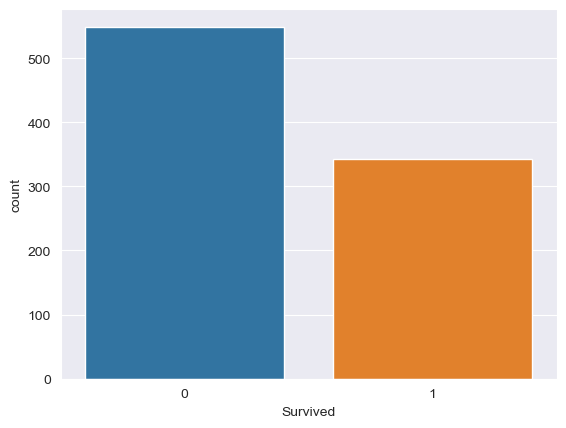

In [10]:
sns.countplot(x = 'Survived', data = tit_df)

In [ ]:
sns.crosstab

<AxesSubplot:xlabel='Sex', ylabel='count'>

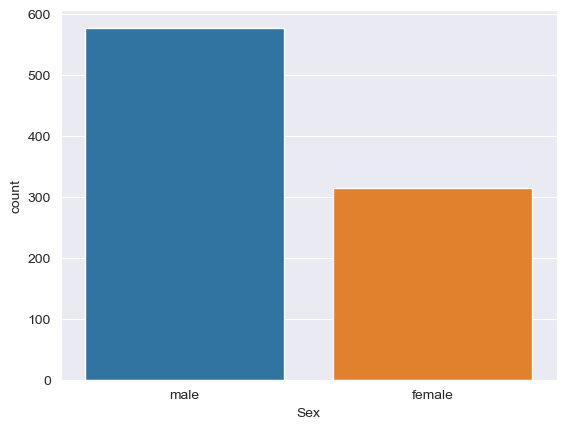

In [11]:
sns.countplot(x = 'Sex', data = tit_df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

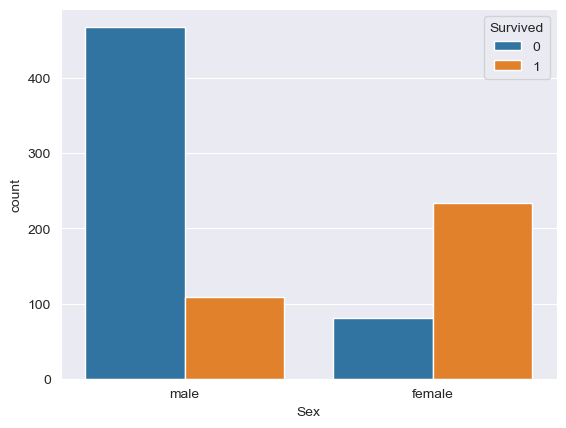

In [12]:
sns.countplot(x = 'Sex',hue='Survived', data = tit_df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

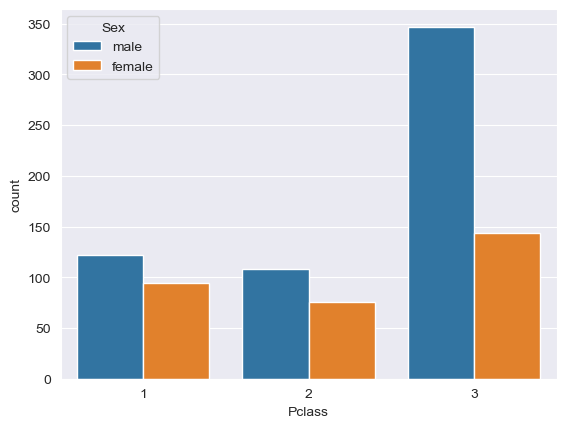

In [13]:
sns.countplot(x = 'Pclass',hue='Sex',data=tit_df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

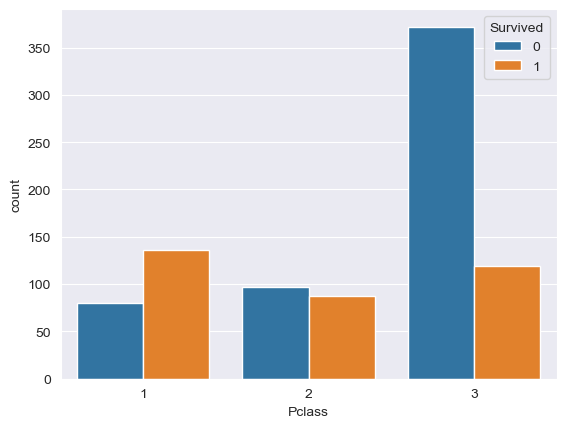

In [14]:
sns.countplot(x = 'Pclass',hue='Survived',data=tit_df)

## Missing Values

In [15]:
duplicate=tit_df.duplicated( )
print (duplicate.sum())

0


In [16]:
tit_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
tit_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
tit_df.isnull().sum().sum()

866

In [19]:
mean1 = tit_df["Age"].mean()
mean1

29.69911764705882

In [20]:
tit_df['Age'] = tit_df['Age'].fillna(value = 0)

In [21]:
tit_df["Age"].replace(0,mean1,inplace=True)

In [22]:
tit_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
tit_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.000000,1,0,28134,11.5000,NaN,S
422,423,0,3,"Zimmerman, Mr. Leo",male,29.000000,0,0,315082,7.8750,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.000000,0,0,4134,9.5875,NaN,S
788,789,1,3,"Dean, Master. Bertram Vere",male,1.000000,1,2,C.A. 2315,20.5750,NaN,S
273,274,0,1,"Natsch, Mr. Charles H",male,37.000000,0,1,PC 17596,29.7000,C118,C
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.000000,0,0,345781,9.5000,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
69,70,0,3,"Kink, Mr. Vincenz",male,26.000000,2,0,315151,8.6625,NaN,S
303,304,1,2,"Keane, Miss. Nora A",female,29.699118,0,0,226593,12.3500,E101,Q


In [24]:
tit_df['Cabin'].isnull().sum()

687

In [25]:
tit_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
mode = tit_df['Embarked'].mode()[0]


In [27]:
tit_df['Embarked'] = tit_df['Embarked'].fillna(mode)

In [28]:
tit_df['Embarked'].isnull().sum()

0

In [29]:
tit_df = tit_df.drop(['Name','Cabin','PassengerId','Fare','Ticket'], axis=1)

In [30]:
tit_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [31]:
tit_df = pd.get_dummies(tit_df,columns=['Sex','Embarked','Pclass'])
tit_df.sample(10)

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
269,1,35.000000,0,0,1,0,0,0,1,1,0,0
597,0,49.000000,0,0,0,1,0,0,1,0,0,1
661,0,40.000000,0,0,0,1,1,0,0,0,0,1
790,0,29.699118,0,0,0,1,0,1,0,0,0,1
567,0,29.000000,0,4,1,0,0,0,1,0,0,1
195,1,58.000000,0,0,1,0,1,0,0,1,0,0
447,1,34.000000,0,0,0,1,0,0,1,1,0,0
60,0,22.000000,0,0,0,1,1,0,0,0,0,1
364,0,29.699118,1,0,0,1,0,1,0,0,0,1
825,0,29.699118,0,0,0,1,0,1,0,0,0,1


In [32]:
tit_df.isnull().sum().sum()

0

In [37]:
tit_df.dtypes

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
dtype: object

## Split

In [38]:
x = tit_df.drop(['Survived'], axis=1) #independent
y = tit_df[['Survived']] #dependent

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30,random_state=1)

In [44]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [45]:
model.score(x_train,y_train)

0.812199036918138

In [46]:
model.score(x_test,y_test)

0.7798507462686567

## For Hotel Bookings

In [47]:
h_df = pd.read_csv("hotel_bookings.csv")

In [48]:
h_df.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

In [53]:
h_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [54]:
h_df = h_df.select_dtypes(exclude=['object'])

In [59]:
tit_df.isnull().sum().sum()

0

In [65]:
h_df = h_df.astype('float32')

In [70]:
h_df = h_df.dropna()

In [71]:
h_df.dtypes

is_canceled                       float32
lead_time                         float32
arrival_date_year                 float32
arrival_date_week_number          float32
arrival_date_day_of_month         float32
stays_in_weekend_nights           float32
stays_in_week_nights              float32
adults                            float32
children                          float32
babies                            float32
is_repeated_guest                 float32
previous_cancellations            float32
previous_bookings_not_canceled    float32
booking_changes                   float32
agent                             float32
company                           float32
days_in_waiting_list              float32
adr                               float32
required_car_parking_spaces       float32
total_of_special_requests         float32
dtype: object

In [72]:
x = h_df.drop(['is_canceled'], axis=1) #independent
y = h_df[['is_canceled']] #dependent

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30,random_state=1)

In [74]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [75]:
model.score(x_train,y_train)

0.9271523178807947

In [76]:
model.score(x_test,y_test)

0.9090909090909091